<a href="https://colab.research.google.com/github/FREDY129053/Practise_Temp/blob/main/Practise_Veg_Fru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Подгрузка данных из датасета**

---



In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q kaggle  # Установка зависимости для скачки датасета

In [3]:
from google.colab import files

files.upload()  # Загрузка файла с данными от Kaggle API

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fredy129053","key":"732172104435df3745774c6e74467316"}'}

In [4]:
!mkdir ~/.kaggle  # Создание папки для данных Kaggle

In [5]:
!cp kaggle.json ~/.kaggle/  # Перенос файла в папку

In [6]:
!chmod 600 ~/.kaggle/kaggle.json  # Задаем права на файл

In [7]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition  # Скачиваем датасет

100% 1.98G/1.98G [00:28<00:00, 97.9MB/s]
100% 1.98G/1.98G [00:28<00:00, 75.7MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip  # Распаковываем датасет

In [10]:
!mkdir /content/drive/MyDrive/Fruits_and_Vegetables_Datset

In [12]:
!cp -r /content/test /content/drive/MyDrive/Fruits_and_Vegetables_Datset/test

In [13]:
!cp -r /content/train /content/drive/MyDrive/Fruits_and_Vegetables_Datset/train

In [14]:
!cp -r /content/validation /content/drive/MyDrive/Fruits_and_Vegetables_Datset/validation

##**Создание модели**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_and_Vegetables_Datset/train',
    labels='inferred',  # Формирование уровней на основе структуры датасета (яблоко, бананы и тд)
    label_mode='categorical',  # Режим уровней и создание (в данном случае) векторной формы уровней
    class_names=None,  # Список классов (папки итак отсортированы, можно не ставить)
    color_mode='rgb',  # Режим картинок
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=42,  # Смысл жизни
    validation_split=None,
    subset=None,
    interpolation='bilinear',  # Нужно для алгоритма сжатия картинок
    follow_links=False,  # Переход по символьным ссылкам папок нахер
    crop_to_aspect_ratio=False  # обрезать тоже не надо
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_and_Vegetables_Datset/validation',
    labels='inferred',  # Формирование уровней на основе структуры датасета (яблоко, бананы и тд)
    label_mode='categorical',  # Режим уровней и создание (в данном случае) векторной формы уровней
    class_names=None,  # Список классов (папки итак отсортированы, можно не ставить)
    color_mode='rgb',  # Режим картинок
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=42,  # Смысл жизни
    validation_split=None,
    subset=None,
    interpolation='bilinear',  # Нужно для алгоритма сжатия картинок
    follow_links=False,  # Переход по символьным ссылкам папок нахер
    crop_to_aspect_ratio=False  # обрезать тоже не надо
)

Found 3152 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


##Создание модели

In [4]:
seq_model = tf.keras.models.Sequential()

###Создание слоев

In [5]:
seq_model.add(tf.keras.layers.Conv2D(
    filters=32,  # Опционально
    kernel_size=3,
    padding='same',
    activation='relu',
    input_shape=[64, 64, 3],
))

seq_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

seq_model.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    strides=2
))

In [6]:
seq_model.add(tf.keras.layers.Dropout(0.25))

In [7]:
seq_model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    padding='same',
    activation='relu',
))

seq_model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    activation='relu',
))

seq_model.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    strides=2
))

In [8]:
seq_model.add(tf.keras.layers.Dropout(0.25))

In [9]:
seq_model.add(tf.keras.layers.Flatten())

In [10]:
seq_model.add(tf.keras.layers.Dense(
    units=512,  # Опционально
    activation='relu'
))

seq_model.add(tf.keras.layers.Dense(
    units=256,  # Опционально
    activation='relu'
))

In [11]:
seq_model.add(tf.keras.layers.Dropout(0.5))  # Чтобы избежать переобучения

In [12]:
seq_model.add(tf.keras.layers.Dense(units=36, activation='softmax'))  # Выходной слой. 36 потому что у нас 36 классов!!!

###Обучение модели

In [13]:
seq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [15]:
train_history = seq_model.fit(x=training_set, validation_data=validation_set, epochs=35)

Epoch 1/35
20/99 [=====>........................] - ETA: 6:09 - loss: 15.8360 - accuracy: 0.0312

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-9511966aeb5f>", line 1, in <cell line: 1>
    train_history = seq_model.fit(x=training_set, validation_data=validation_set, epochs=35)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist

TypeError: object of type 'NoneType' has no len()

In [31]:
seq_model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
import json

with open('train_history', 'w') as f:
  json.dump(train_history.history, f)

In [35]:
print(f"Точность модели = {train_history.history['val_accuracy'][-1] * 100:.2f}%")

Точность модели = 94.59%


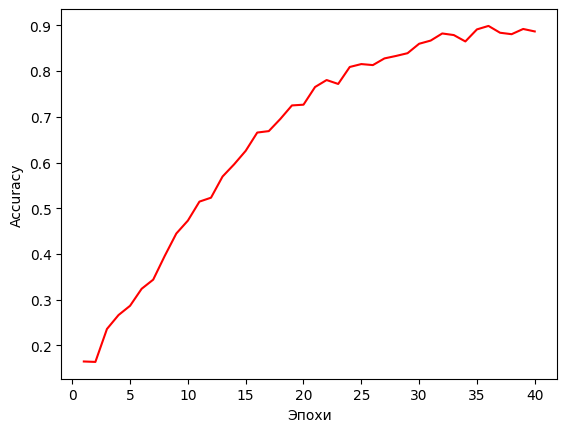

In [37]:
epochs = [i for i in range(1, 41)]

plt.plot(epochs, train_history.history['accuracy'], color='r')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.show();

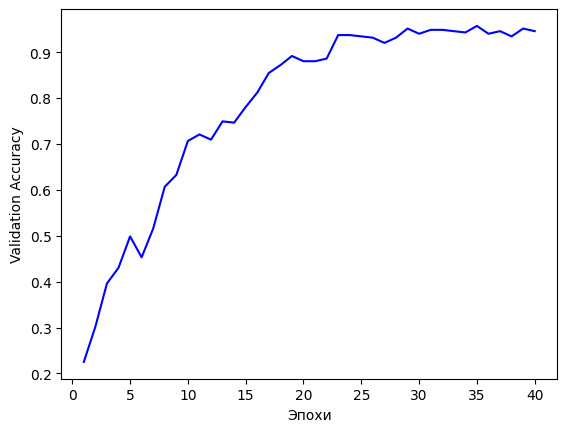

In [38]:
plt.plot(epochs, train_history.history['val_accuracy'], color='b')
plt.xlabel('Эпохи')
plt.ylabel('Validation Accuracy')
plt.show();

##Загрузка модели и тест ее

In [39]:
model = tf.keras.models.load_model('/content/trained_model.h5')

In [65]:
image_path = '/content/MY_cabbage.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # В двумерную матрицу

prediction = model.predict(input_arr)
print(prediction[0])

1/1 [==============================] - 0s 35ms/step
[2.9197766e-04 1.0177966e-02 6.6605127e-05 8.0971862e-04 4.6191254e-04
 7.2025973e-04 5.8327464e-04 8.1200644e-02 6.4891436e-05 5.9928101e-02
 7.4901304e-04 2.0801383e-05 4.9678446e-03 2.0282321e-01 1.5536170e-03
 9.0715410e-05 6.0929591e-03 5.2581564e-02 3.1204948e-03 1.4394091e-03
 1.0081595e-03 4.6015540e-03 1.6482176e-04 8.3092100e-04 1.2992021e-03
 3.8323379e-03 3.7643276e-05 1.3068271e-02 6.4760534e-04 5.3407782e-01
 1.4266638e-03 3.4650746e-03 8.4212952e-04 1.7639044e-05 6.3572456e-03
 5.7798182e-04]


In [66]:
result_index_of_prediction = np.where(prediction[0] == max(prediction[0]))

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_and_Vegetables_Datset/test',
    labels='inferred',  # Формирование уровней на основе структуры датасета (яблоко, бананы и тд)
    label_mode='categorical',  # Режим уровней и создание (в данном случае) векторной формы уровней
    class_names=None,  # Список классов (папки итак отсортированы, можно не ставить)
    color_mode='rgb',  # Режим картинок
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=42,  # Смысл жизни
    validation_split=None,
    subset=None,
    interpolation='bilinear',  # Нужно для алгоритма сжатия картинок
    follow_links=False,  # Переход по символьным ссылкам папок нахер
    crop_to_aspect_ratio=False  # обрезать тоже не надо
)

print(f"Result of prediction: \nOn image is {test_set.class_names[result_index_of_prediction[0][0]]}")

Found 359 files belonging to 36 classes.
Result of prediction: 
On image is soy beans
